In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('forest_updated1')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

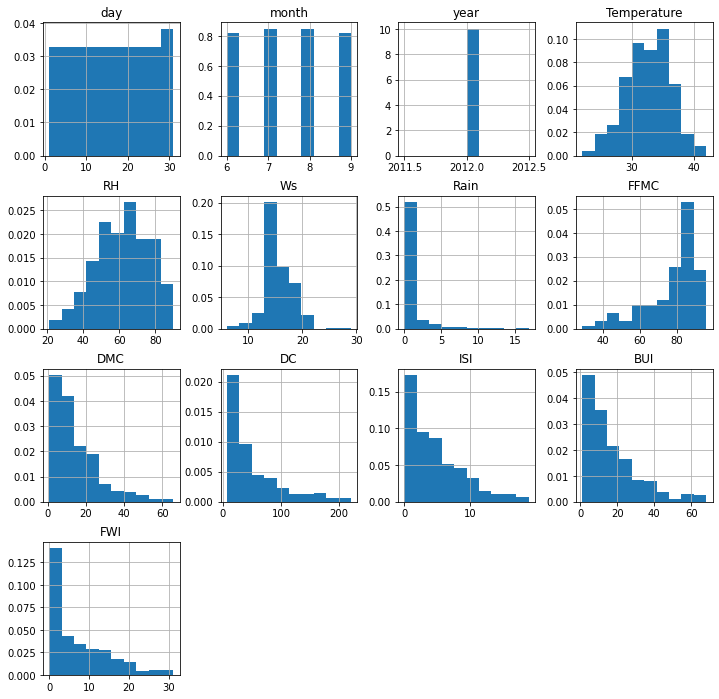

In [3]:
df.hist(density=True, figsize=(12,12))

#### Observation1:  'Temperature' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

#### Observation2 :  As year doesnt possess any distribution , hence we can remove year column

In [4]:
df.reset_index(drop=True)
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'classes'],
      dtype='object')

<BarContainer object of 2 artists>

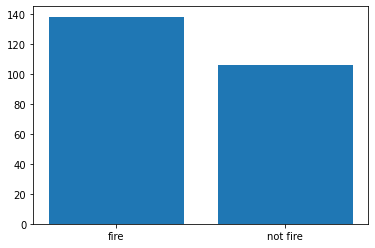

In [5]:
classes = df.groupby(['classes'])['classes'].count()
plt.bar(classes.index, classes)

#### Observation- Our dependent variable classes has balance dataset

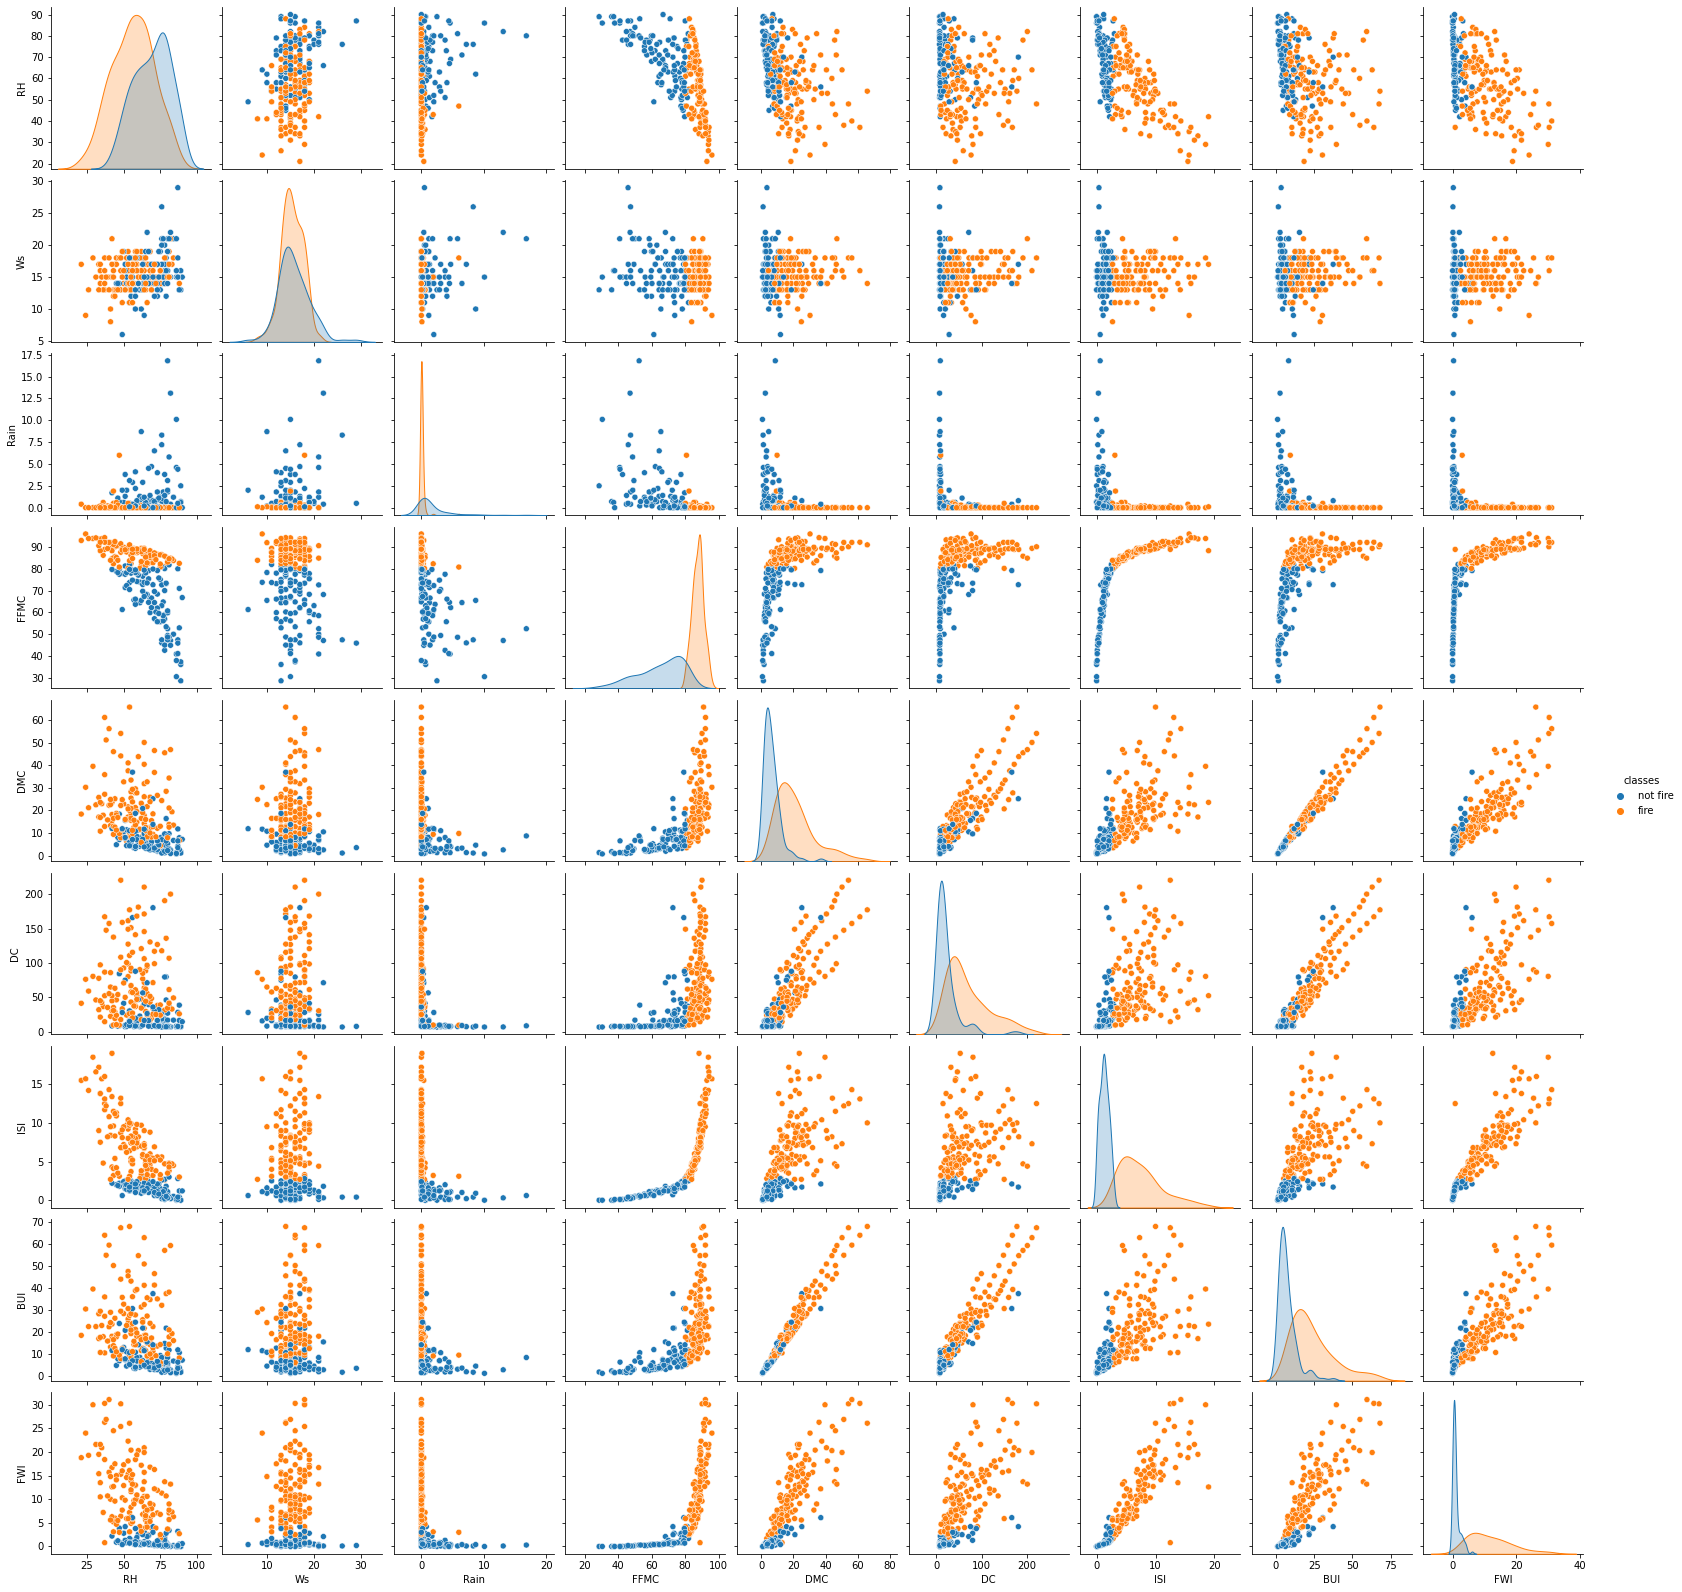

In [6]:
sns.pairplot(df.drop(columns=['day', 'month', 'year', 'Temperature']),hue='classes')

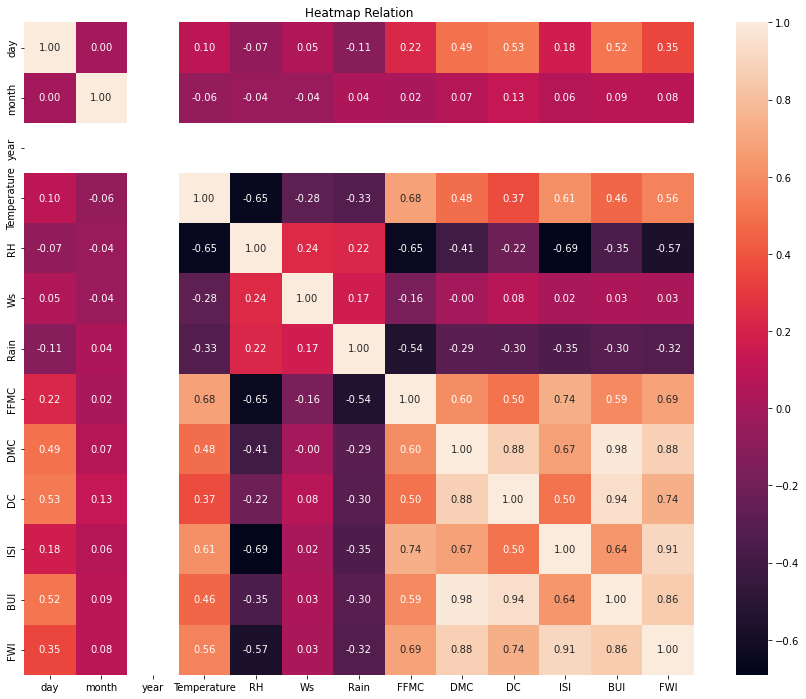

In [7]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(df.corr(), annot=True, fmt='.2f');

#### Observation1 - As we can see in this heatmap, The lighter color shows the higher cor-relation betweem two variables and the darker color has less relation ship.

#### Observation2 - Many features are showing -ve correaltion with dependent variable , So we can remove them to increase accuracy of our model
#### Observation3 - FFMC and ISI has especially higher correlation with dependent var temperature

In [8]:
df.corr()['Temperature']

day            0.095772
month         -0.059017
year                NaN
Temperature    1.000000
RH            -0.654443
Ws            -0.278132
Rain          -0.326786
FFMC           0.677491
DMC            0.483105
DC             0.370511
ISI            0.607551
BUI            0.455504
FWI            0.559201
Name: Temperature, dtype: float64

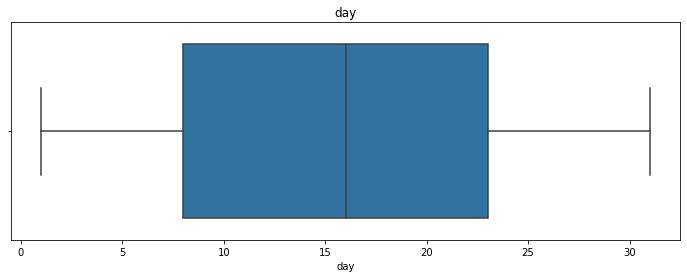

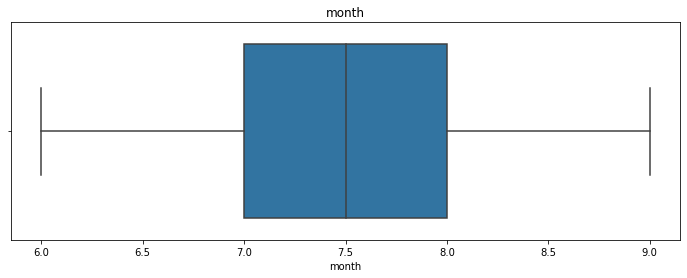

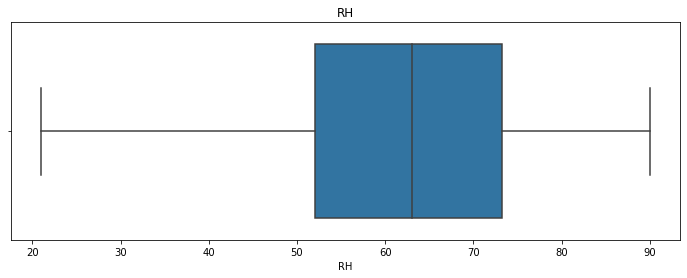

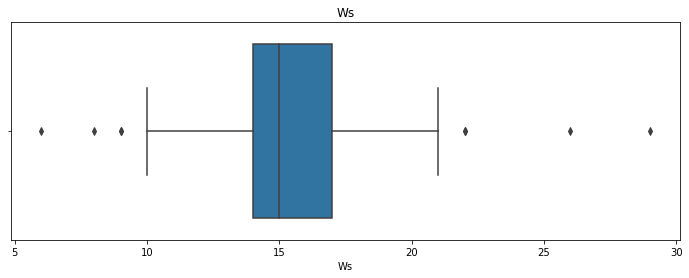

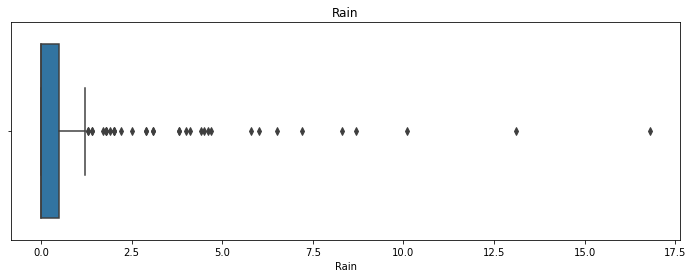

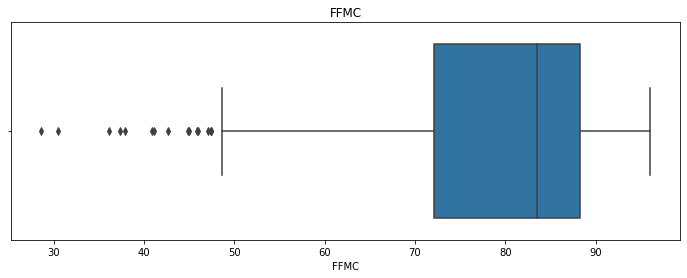

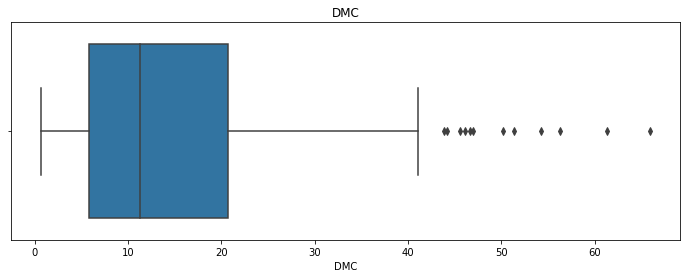

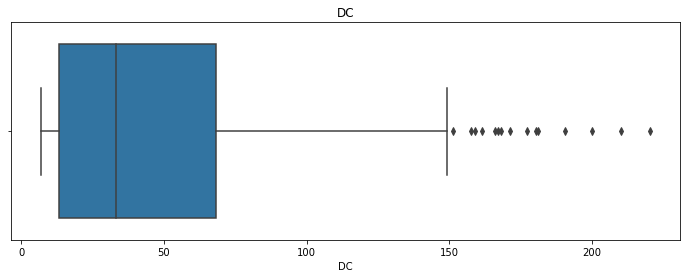

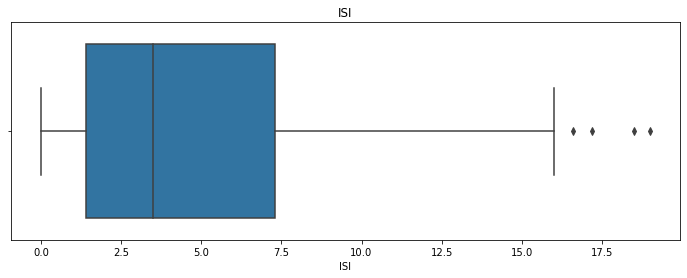

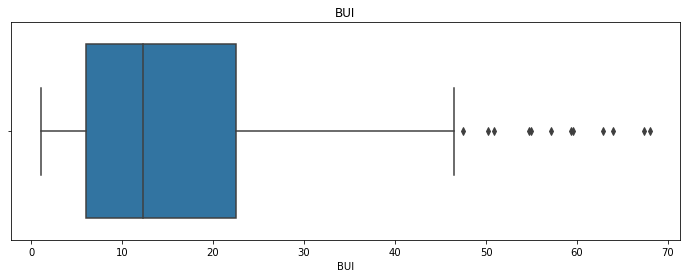

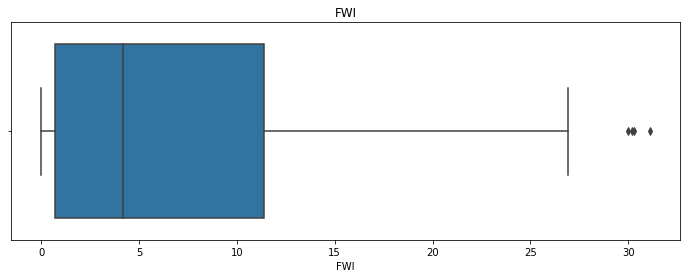

In [9]:
X = df.drop(columns=['Temperature','year','classes'],axis=1)
X.columns
for col in X.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(X[col])
    plt.title(col)

#### Observation- Outliers are there in our data

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

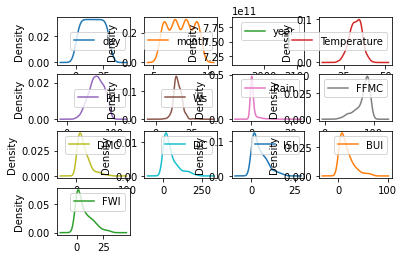

In [10]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

In [16]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))

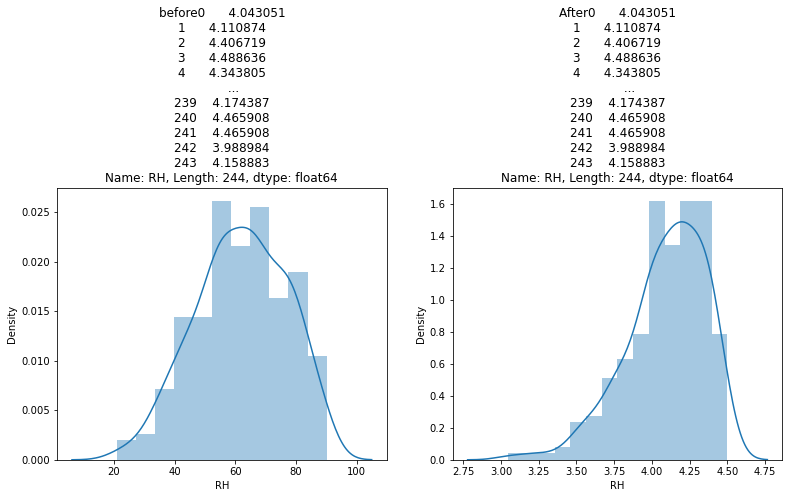

In [17]:
plots(df,'RH',np.log(df['RH']))

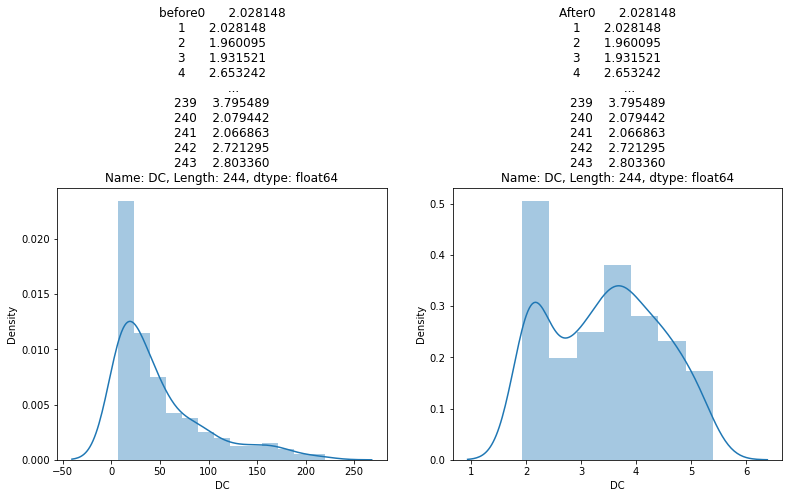

In [18]:
plots(df,'DC',np.log(df['DC']))

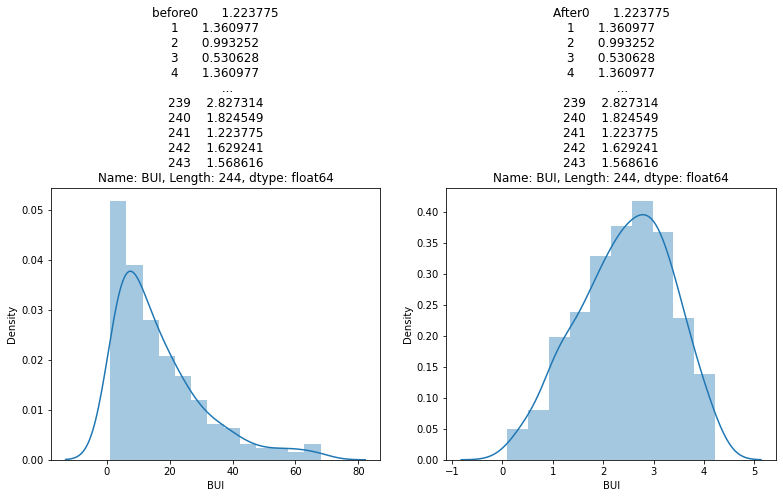

In [19]:
plots(df,'BUI',np.log(df['BUI']))

#### Observation : After Applying function transformmers , some skewness fixed

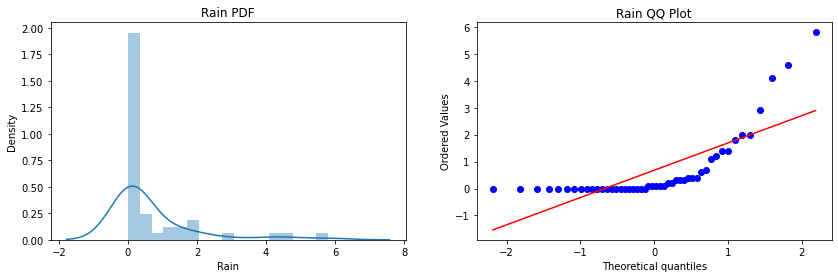

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Rain'])
plt.title('Rain PDF')

plt.subplot(122)
stats.probplot(X_train['Rain'], dist="norm", plot=plt)
plt.title('Rain QQ Plot')

plt.show()

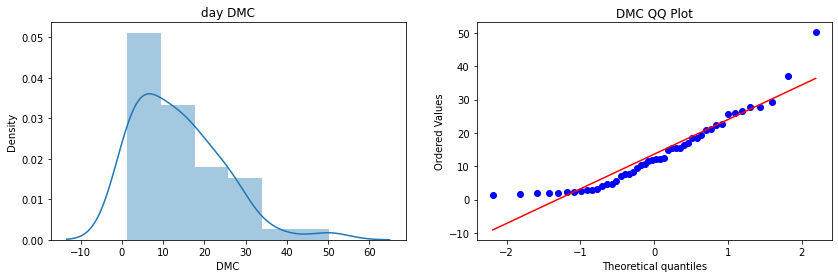

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['DMC'])
plt.title('day DMC')

plt.subplot(122)
stats.probplot(X_train['DMC'], dist="norm", plot=plt)
plt.title('DMC QQ Plot')

plt.show()

In [48]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After' + str(t))

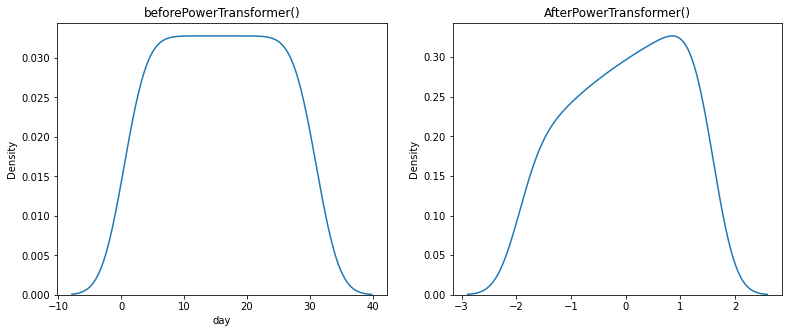

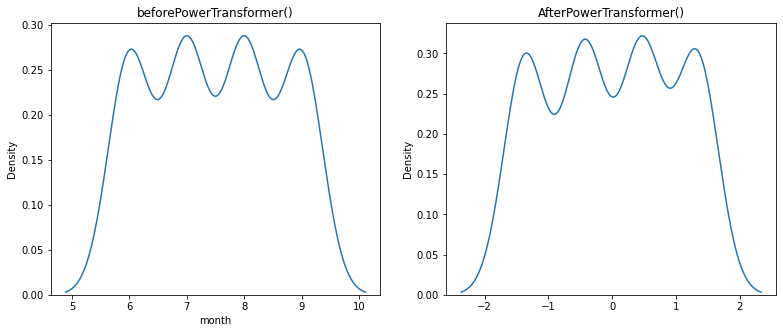

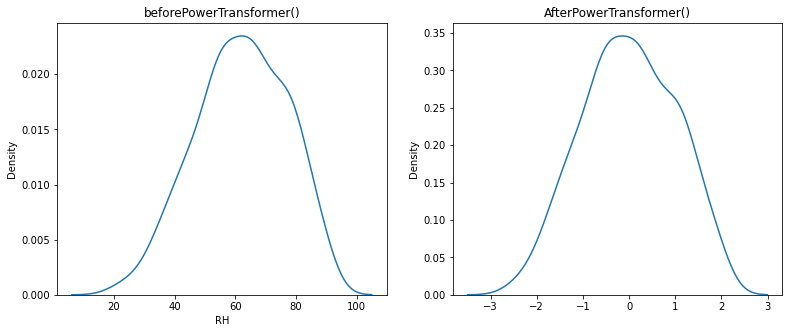

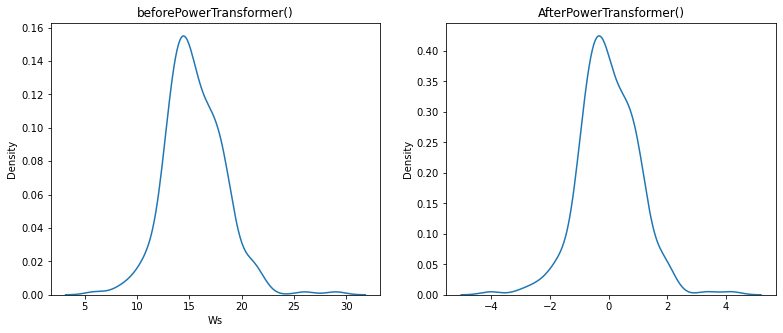

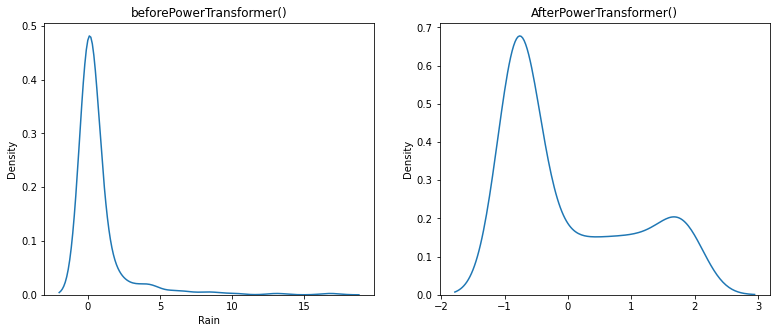

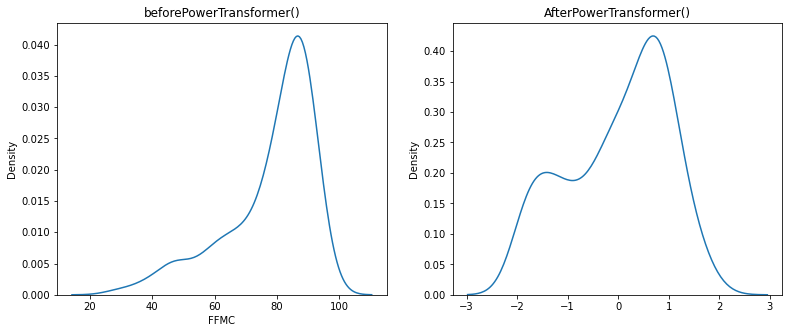

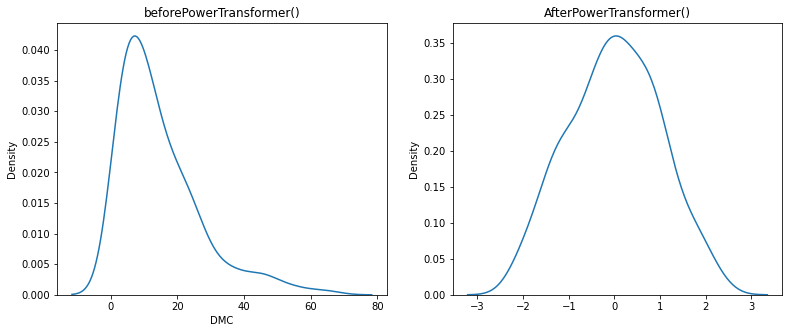

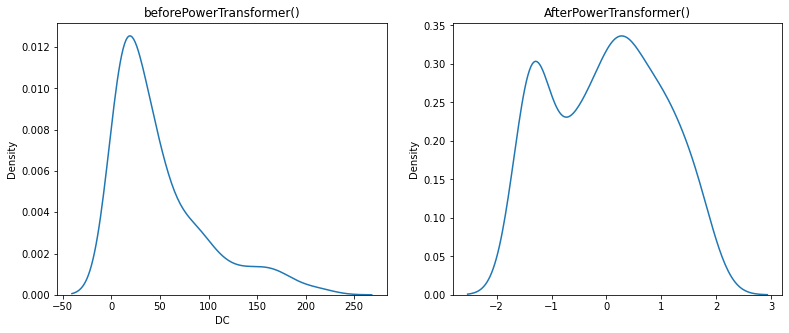

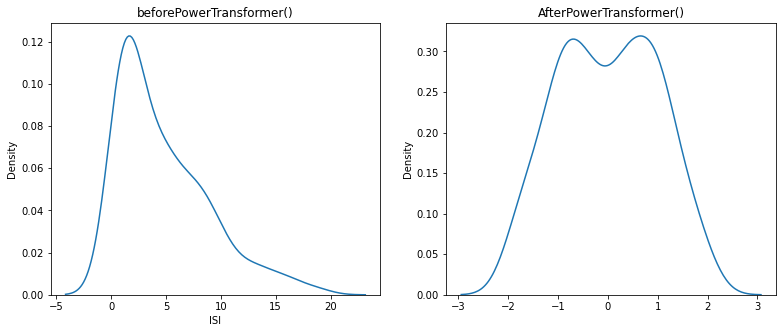

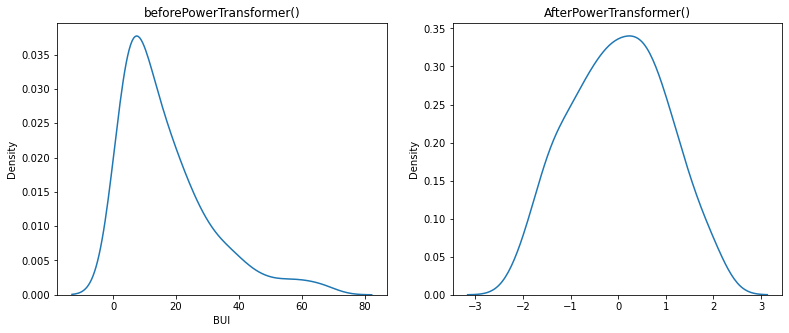

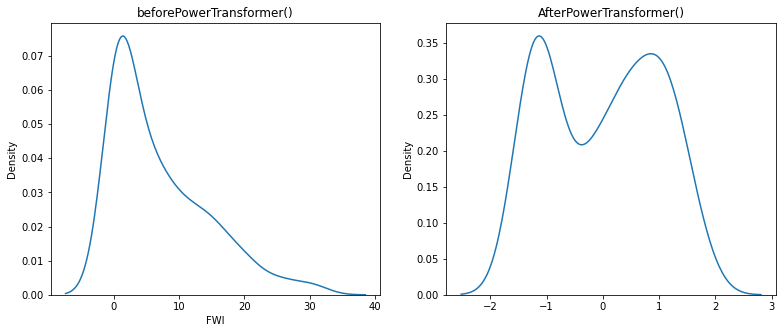

In [49]:
## Applying Yeo johnson as our datasets has some 0 values also
for col in ['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    plots(X,col,PowerTransformer())
    

#### Observation : After applying Power Transform distplots did not change 

<BarContainer object of 173 artists>

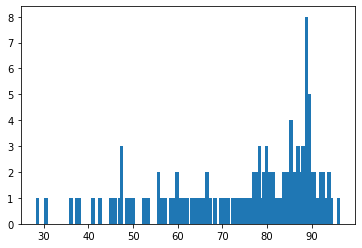

In [50]:
t= df.groupby(['FFMC'])['FFMC'].count()
plt.bar(t.index,t)

<BarContainer object of 198 artists>

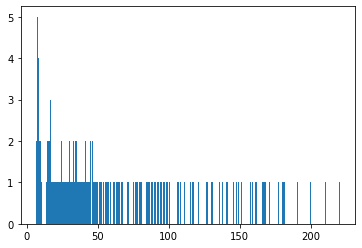

In [52]:
t= df.groupby(['DC'])['DC'].count()
plt.bar(t.index,t)

#### Observation : Upsamling/Downsampling required

In [13]:
X = df.drop(columns=['Temperature','year'],axis=1)
y = df['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=2)

In [20]:
# What is highest temperature
df['Temperature'].max()

42

In [21]:
# What is lowest temperature
df['Temperature'].min()

22

In [22]:
#When did it rain the most?
df.sort_values(by='Rain',ascending=False).head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
91,31,8,2012,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire


In [23]:
##When did it rain the least?
df.sort_values(by='Rain').head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire


In [24]:
# What month is the hottest
df.sort_values(by='Temperature', ascending=False).head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
199,17,8,2012,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,fire


In [25]:
df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [26]:
df['classes'].value_counts()/len(df)

fire        0.565574
not fire    0.434426
Name: classes, dtype: float64

In [27]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'classes'],
      dtype='object')

In [28]:
df.groupby(['month','classes'])['classes'].count()

month  classes 
6      fire        25
       not fire    35
7      fire        39
       not fire    23
8      fire        51
       not fire    11
9      fire        23
       not fire    37
Name: classes, dtype: int64